2602191301 - Allin Setiawan

# **Import Dataset**

In [ ]:
!unzip '/content/t10k-images-idx3-ubyte.zip'
!unzip '/content/train-images-idx3-ubyte.zip'
!unzip '/content/train-labels-idx1-ubyte.zip'
!unzip '/content/t10k-labels-idx1-ubyte.zip'

Archive:  /content/t10k-images-idx3-ubyte.zip
  inflating: t10k-images-idx3-ubyte  
Archive:  /content/train-images-idx3-ubyte.zip
  inflating: train-images-idx3-ubyte  
Archive:  /content/train-labels-idx1-ubyte.zip
  inflating: train-labels-idx1-ubyte  
Archive:  /content/t10k-labels-idx1-ubyte.zip
  inflating: t10k-labels-idx1-ubyte  


In [ ]:
!pip install idx2numpy
import idx2numpy

x_train = idx2numpy.convert_from_file('train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels-idx1-ubyte')

x_test = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=d612bc72e4de96e35ae2f6bd8d72e82e772373362db8e4bd79cb9001df28b727
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


# **Preprocessing and Scaling Dataset**

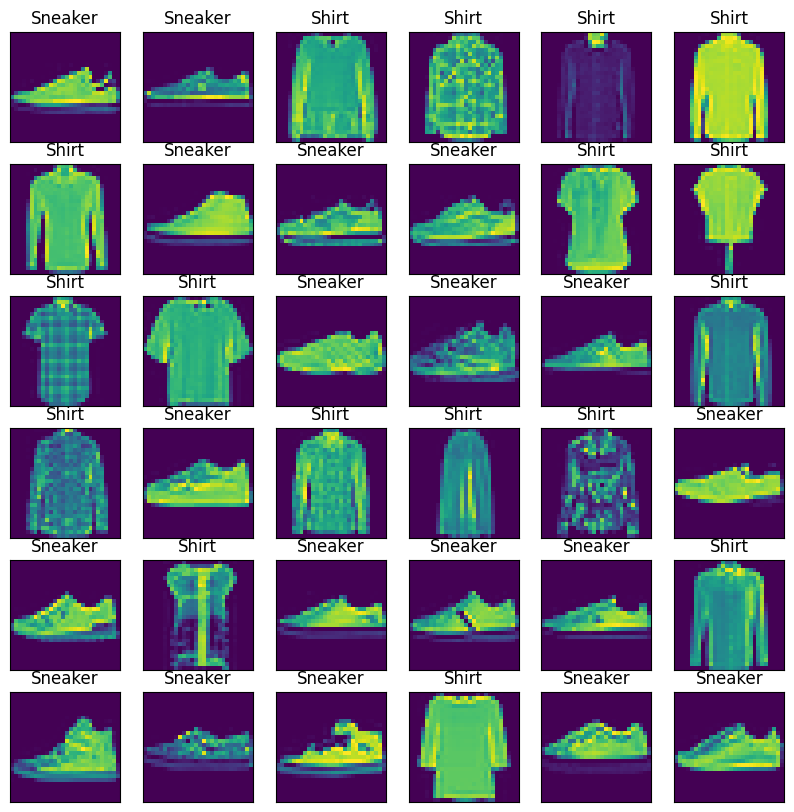

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Sesuai dengan soal mengambil label 'shirt' dan 'sneaker' untuk dataset ini
classes_of_interest = ['Shirt', 'Sneaker']
original_labels = [6, 7] #shirt = 6, sneaker = 7

mask = np.isin(y_train, original_labels)

# Filter pada training data
x_train_filtered = x_train[mask]
y_train_filtered = y_train[mask]

# Melakukan Mapping dari original labels ke new labels (0 for 'Shirt', 1 for 'Sneaker')
mapping = {6: 0, 7: 1}
y_train_filtered = np.array([mapping[label] for label in y_train_filtered])

class_names = ['Shirt', 'Sneaker']

plt.figure(figsize=(10, 10))
for i in range(min(36, len(x_train_filtered))):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_filtered[i].reshape((28,28)))
    label_index = int(y_train_filtered[i])
    plt.title(class_names[label_index])
plt.show()

Saya membuat class baru untuk model autoencoder ini dikarenakan pada soal kelas yang diberikan hanya 'shirt' dan 'sneakers'

In [ ]:
#Scaling Dataset
x_train_filtered = x_train_filtered.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Melakukan split data training 80% dan remaining untuk (validation dan test)
x_train, x_remaining, y_train, y_remaining = train_test_split(
    x_train_filtered, y_train_filtered, test_size=0.2, random_state=42
)

# Melakukan split data remaining dibagi menjadi ke test dan validation
x_val, x_test, y_val, y_test = train_test_split(
    x_remaining, y_remaining, test_size=0.5, random_state=42
)

In [ ]:
print("Train shapes:", x_train.shape, y_train.shape)
print("Validation shapes:", x_val.shape, y_val.shape)
print("Test shapes:", x_test.shape, y_test.shape)

Train shapes: (9600, 28, 28) (9600,)
Validation shapes: (1200, 28, 28) (1200,)
Test shapes: (1200, 28, 28) (1200,)


# **Model Autoencoder**

In [ ]:
!pip install scikit-image

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from skimage.metrics import structural_similarity as ssim

input_dim = 784
encoding_dim = 128

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_filtered.reshape(-1, input_dim), x_train_filtered.reshape(-1, input_dim),
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test.reshape(-1, input_dim), x_test.reshape(-1, input_dim)))

Epoch 1/20
47/47 [==============================] - 3s 7ms/step - loss: 0.4598 - val_loss: 0.3673
Epoch 2/20
47/47 [==============================] - 0s 4ms/step - loss: 0.3443 - val_loss: 0.3308
Epoch 3/20
47/47 [==============================] - 0s 4ms/step - loss: 0.3201 - val_loss: 0.3155
Epoch 4/20
47/47 [==============================] - 0s 4ms/step - loss: 0.3081 - val_loss: 0.3064
Epoch 5/20
47/47 [==============================] - 0s 4ms/step - loss: 0.3004 - val_loss: 0.2998
Epoch 6/20
47/47 [==============================] - 0s 4ms/step - loss: 0.2950 - val_loss: 0.2957
Epoch 7/20
47/47 [==============================] - 0s 4ms/step - loss: 0.2911 - val_loss: 0.2920
Epoch 8/20
47/47 [==============================] - 0s 4ms/step - loss: 0.2881 - val_loss: 0.2891
Epoch 9/20
47/47 [==============================] - 0s 4ms/step - loss: 0.2853 - val_loss: 0.2866
Epoch 10/20
47/47 [==============================] - 0s 4ms/step - loss: 0.2829 - val_loss: 0.2843
Epoch 11/20
47/47 [

In [ ]:
decoded_imgs = autoencoder.predict(x_test.reshape(-1, input_dim))

38/38 [==============================] - 0s 2ms/step


# **Evaluate With SSIM Scores**

SSIM Scores -> Indeks SSIM yang dihasilkan adalah nilai desimal antara -1 dan 1, di mana 1 menunjukkan kesamaan sempurna, 0 menunjukkan tidak ada kesamaan, dan -1 menunjukkan anti-korelasi sempurna.

In [ ]:
ssim_scores = []
for i in range(x_test.shape[0]):
    original_img = x_test[i].reshape(28, 28)
    img_predict = decoded_imgs[i].reshape(28, 28)

    ssim_score = ssim(original_img, img_predict, data_range=original_img.max() - original_img.min())
    ssim_scores.append(ssim_score)
average_ssim = np.mean(ssim_scores)
print("Average SSIM on test data:", average_ssim)

Average SSIM on test data: 0.7657012151596361


Nilai rata-rata ssim pada test data untuk model ini adalah 0.76 yang mendekati nilai 1 berarti model ini dapat menunjukkan adanya kesamaan yang sempurna pada gambar yang digenerate dengan original gambarnya

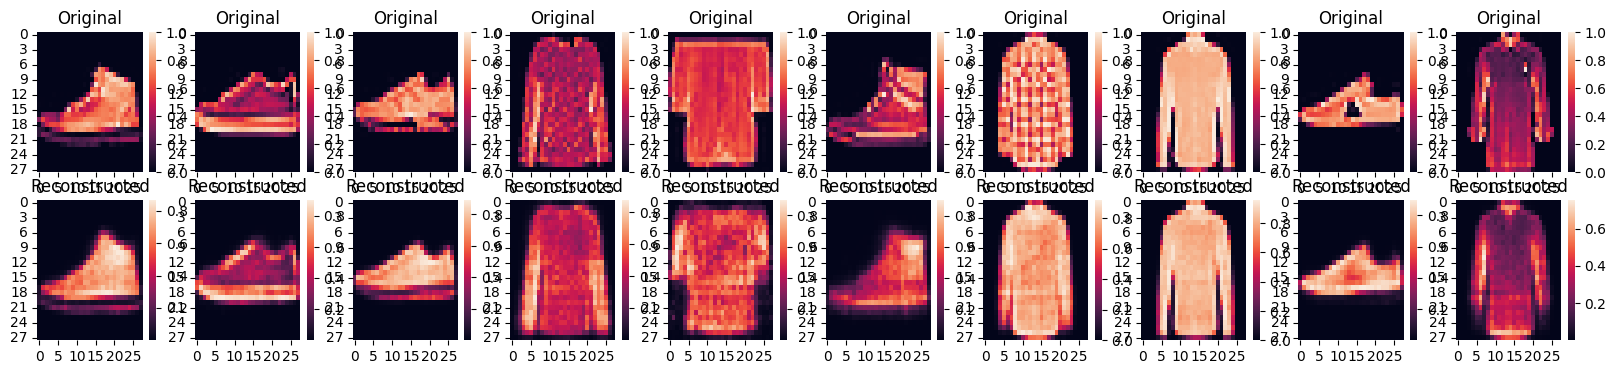

In [ ]:
import seaborn as sns
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  sns.heatmap(x_test[i].reshape(28, 28), ax=ax)
  ax.set_title("Original")
  ax.set_xlabel('')
  ax.set_ylabel('')

  ax = plt.subplot(2, n, i + 1 + n)
  sns.heatmap(decoded_imgs[i].reshape(28, 28), ax=ax)
  ax.set_title('Reconstructed')
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.show()

# **Link Video**
https://youtu.be/_s-FBw3w-7o